# DLProfile Example using mmaADSP Benchmark

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [8]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/benchmark/cosmoflow/cosmoflow_run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 525410 of 525410 Parsing DXT File 
[============================================================] 100.0% 16927 of 16927 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [31]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].nunique())
pp.pprint(sorted(df['Filename'].unique().tolist()))

'Files used in the application'
64
['/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1002_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_1021_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_103_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_137_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_150_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_152_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_156_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_157_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_185_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_212_of_1024.tfrecords',
 '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_217

In [32]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].nunique())
pp.pprint(sorted(df_normal['Filename'].unique().tolist()))

'Files used in the application'
168
['/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03832.input_pipeline.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03832.kernel_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03832.overview_page.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03832.tensorflow_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03832.trace.json.gz',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03834.input_pipeline.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03834.kernel_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_29_01_03_15/nid03834

### Collect the summary of the Application

In [11]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']/8))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])/8*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.1f} GB".format(32))
print("\tMin,Max\t\t\t:\t{:0.1f} GB and {:0.1f} GB".format(2,2))
print("\tAverage\t\t\t:\t{:0.1f} GB".format(2))



Data Access Summary (from Darshan):
Total Job time			:	293.00 seconds
Time spent in I/O		:	10.76 seconds
% Time spent in I/O		:	3.67%
Total Data Accessed		:	512.04 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	64
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 1048399 bytes
	Average			:	523690 bytes
	Median			:	12 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 2500 MB/s
	Average			:	899 MB/s
	Median			:	0 MB/s
Access Pattern:
	Sequential		:	99.90%
	Consecutive		:	99.90%


Files Summary:
File Types			:	['tfrecords']
Dataset Size:
	Total			:	32.0 GB
	Min,Max			:	2.0 GB and 2.0 GB
	Average			:	2.0 GB


In [12]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 293.0 seconds'


In [13]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()/8))

'Time spent by application on I/O: 10.76148281242225 seconds'


### I/O time spent on each file

In [14]:
for file in df['Filename'].unique()[:16]:
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_55_of_1024.tfrecords: 1.39 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords: 1.36 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_946_of_1024.tfrecords: 1.36 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_812_of_1024.tfrecords: 1.38 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_32_of_1024.tfrecords: 1.36 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_849_of_1024.tfrecords: 1.35 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_518_of_1024.tfrecords: 1.35 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_409_of_1024.tfrecords: 1.37 seconds
I/O time for file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_26_of_1024.tfrecords: 1.35 seconds
I/O time for 

### I/O Time spent per rank

In [15]:
for rank in df['Rank'].unique()[:16]:
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 85.46 seconds
I/O time for rank 1: 86.61 seconds
I/O time for rank 2: 85.62 seconds
I/O time for rank 3: 86.50 seconds
I/O time for rank 4: 86.11 seconds
I/O time for rank 5: 86.27 seconds
I/O time for rank 6: 85.64 seconds
I/O time for rank 7: 86.52 seconds


In [16]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 512.04 GB'

### I/O performed on each file

In [17]:
for file in df['Filename'].unique()[:16]:
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_55_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_946_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_812_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_32_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_849_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_518_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_409_of_1024.tfrecords: 4095.36 MB
I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmoflow/img_26_of_1024.tfrecords: 4095.3

In [18]:
for rank in df['Rank'].unique()[:16]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 32532.88 MB
I/O performed by rank 1: 32532.88 MB
I/O performed by rank 2: 32532.88 MB
I/O performed by rank 3: 32532.88 MB
I/O performed by rank 4: 32532.88 MB
I/O performed by rank 5: 32532.88 MB
I/O performed by rank 6: 32532.88 MB
I/O performed by rank 7: 32532.88 MB


In [19]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'img_1002_of_1024': 536786432.0,
 'img_1021_of_1024': 536786432.0,
 'img_103_of_1024': 536786432.0,
 'img_108_of_1024': 536786432.0,
 'img_110_of_1024': 536786432.0,
 'img_114_of_1024': 536786432.0,
 'img_137_of_1024': 536786432.0,
 'img_14_of_1024': 536786432.0,
 'img_150_of_1024': 536786432.0,
 'img_152_of_1024': 536786432.0,
 'img_156_of_1024': 536786432.0,
 'img_157_of_1024': 536786432.0,
 'img_167_of_1024': 536786432.0,
 'img_185_of_1024': 536786432.0,
 'img_189_of_1024': 536786432.0,
 'img_1_of_1024': 536786432.0,
 'img_212_of_1024': 536786432.0,
 'img_214_of_1024': 536786432.0,
 'img_217_of_1024': 536786432.0,
 'img_220_of_1024': 536786432.0,
 'img_230_of_1024': 536786432.0,
 'img_232_of_1024': 536786432.0,
 'img_237_of_1024': 536786432.0,
 'img_245_of_1024': 536786432.0,
 'img_257_of_1024': 536786432.0,
 'img_26_of_1024': 536786432.0,
 'img_281_of_1024': 536786432.0,
 'img_291_of_1024': 536786432.0,
 'img_295_of_1024': 536786432.0,
 'img_297_of_1024': 5

In [20]:
file="/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords"
!ls -l $file

-rw-r----- 1 memani MLPerfHPC 2147490944 Feb 12  2019 /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords


### How application access data over time.

[============================================================] 100.0% 521120 of 521120 Creating Timeline 


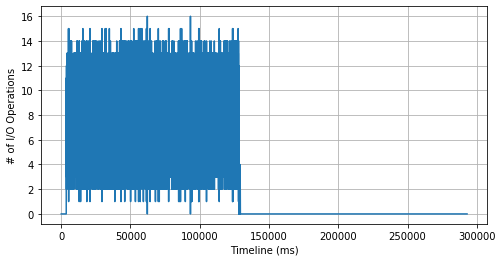

In [21]:
tl = profile.CreateIOTimeline(time_step=0.001)
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("# of I/O Operations")
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

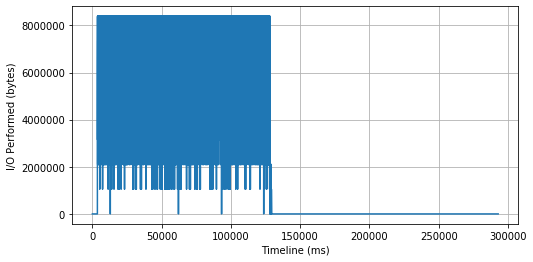

In [22]:
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("I/O Performed (bytes)")
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


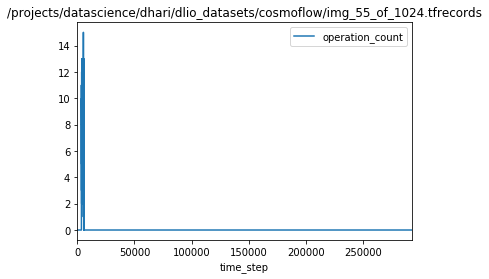

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


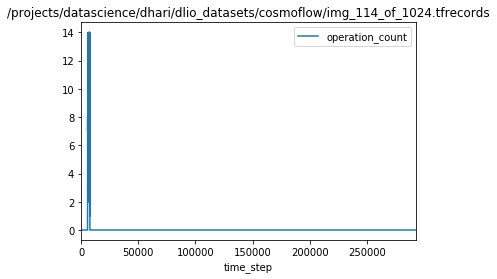

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


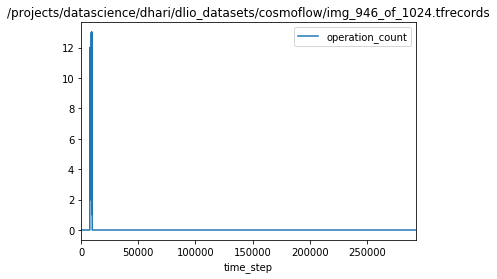

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


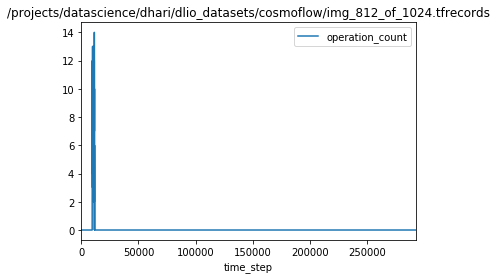

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


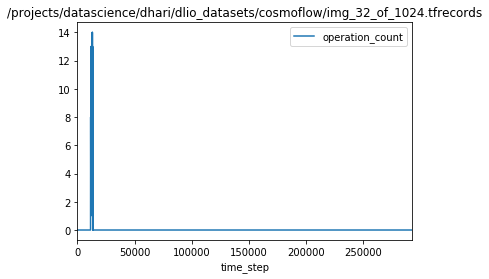

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


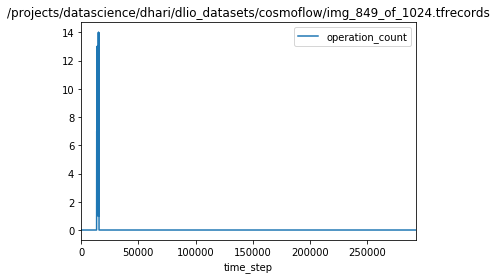

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


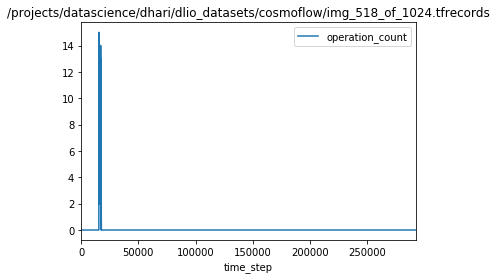

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


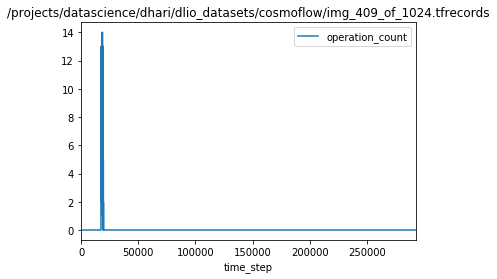

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


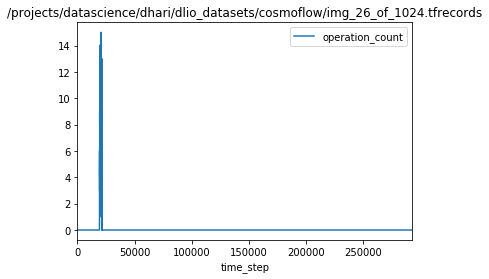

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


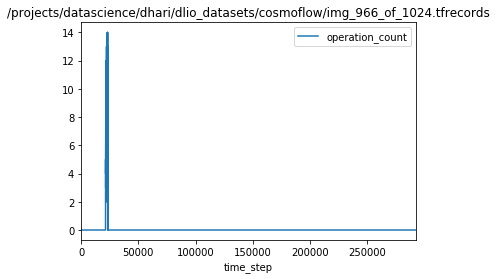

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


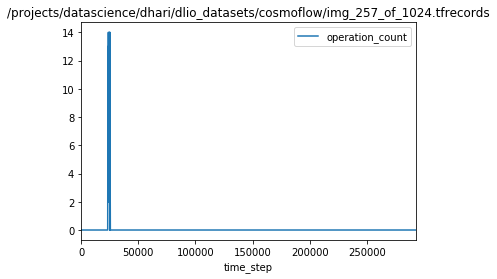

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


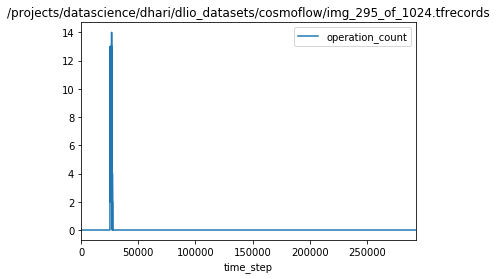

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


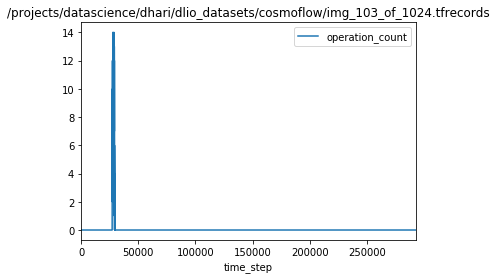

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


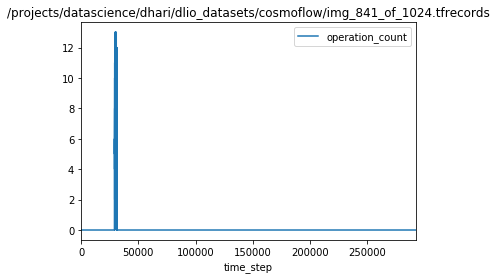

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


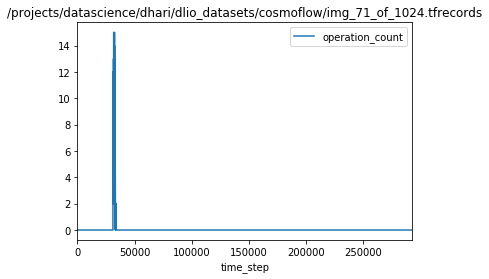

[============================================================] 100.0% 8200 of 8200 Creating Timeline 


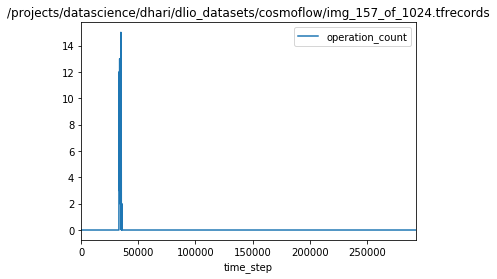

In [23]:
for file in df['Filename'].unique()[:16]:
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


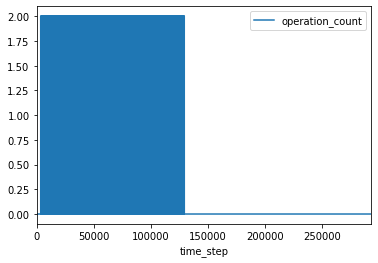

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


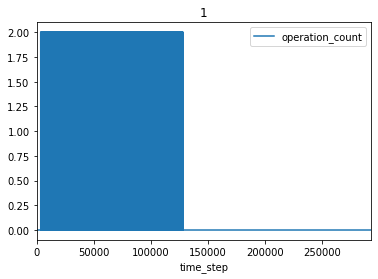

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


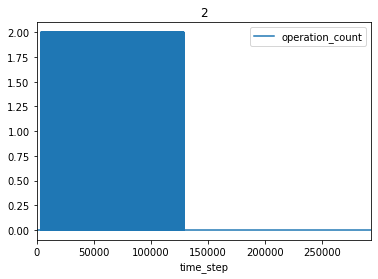

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


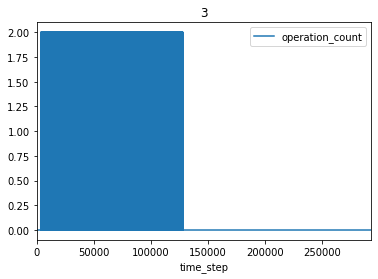

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


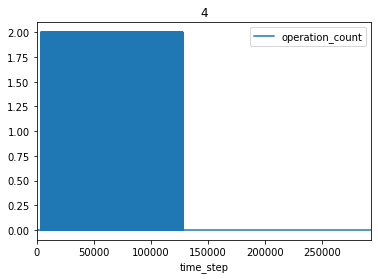

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


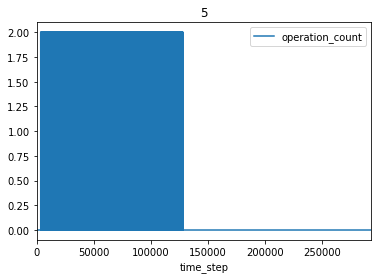

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


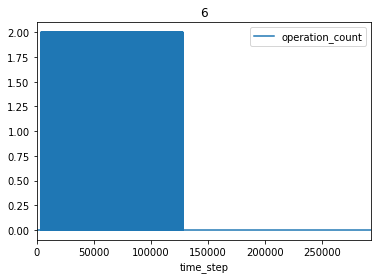

[============================================================] 100.0% 65140 of 65140 Creating Timeline 


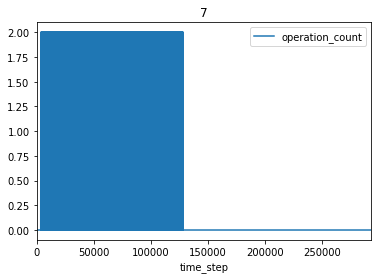

In [24]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.CreateIOTimeline(rank=rank, time_step = 0.001)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

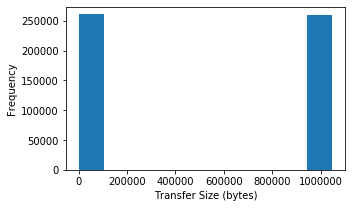

In [25]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3));
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

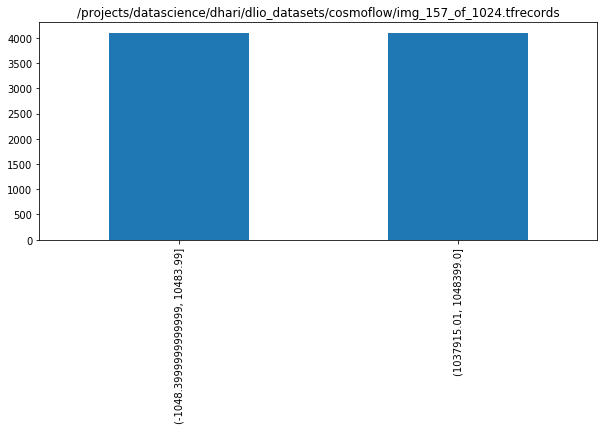

In [26]:
for file in df['Filename'].unique()[:16]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)

### Data Transfer Sizes per Rank

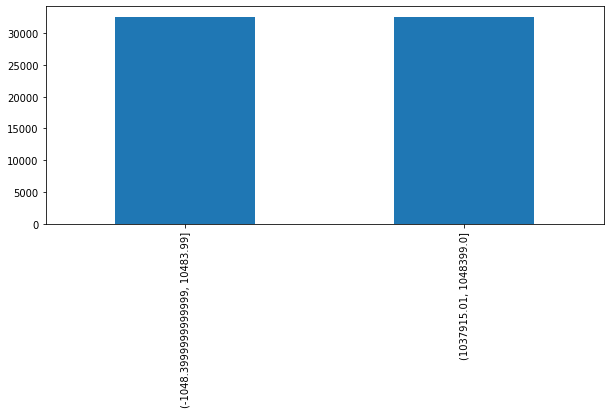

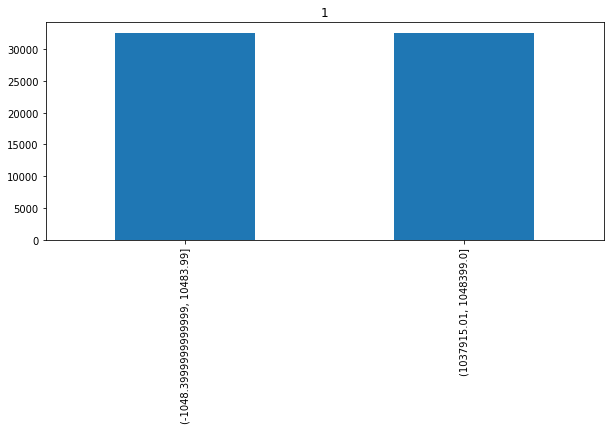

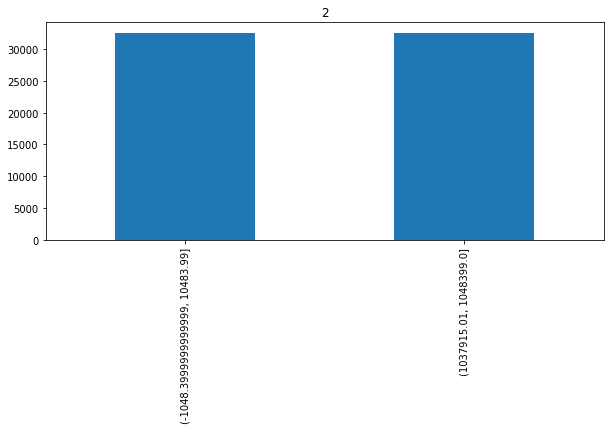

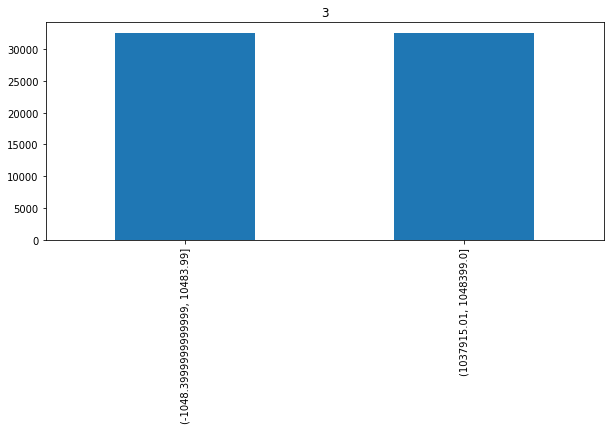

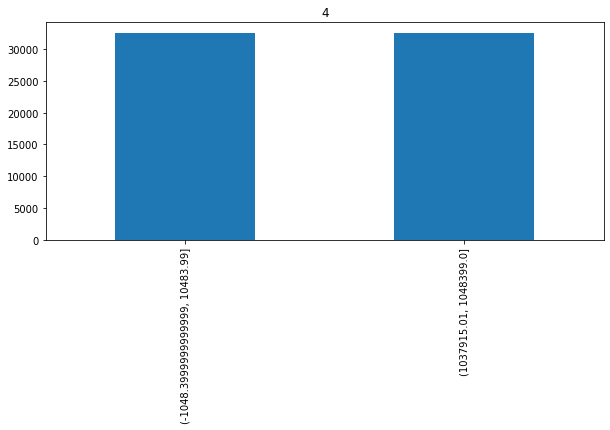

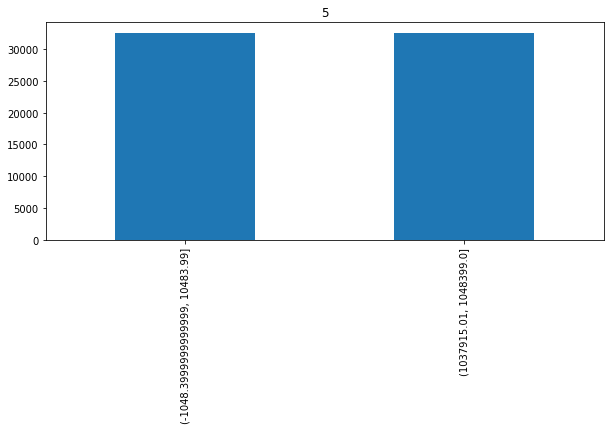

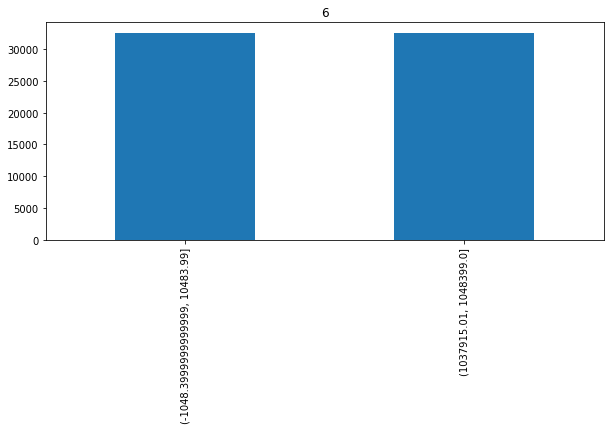

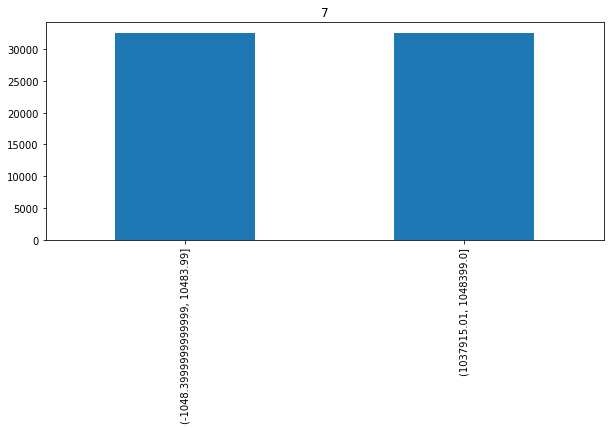

In [27]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [28]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique()[:16]:
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'tfrecords',
 'filename': 'img_55_of_1024',
 'io_size': 4294291456,
 'io_time': 1.3920749999999873,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_55_of_1024.tfrecords',
 'size': 536786432,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_114_of_1024',
 'io_size': 4294291456,
 'io_time': 1.3596499999999896,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_114_of_1024.tfrecords',
 'size': 536786432,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_946_of_1024',
 'io_size': 4294291456,
 'io_time': 1.3567499999999844,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_946_of_1024.tfrecords',
 'size': 536786432,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_812_of_1024',
 'io_size': 4294291456,
 'io_time': 1.3781499999999682,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmoflow/img_812_of_1024.tfrecords',
 'size': 536786432,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'img_32_of_1024',
 'io_size'